### NARPS fmri qa



In [10]:
import os
import numpy,pandas
import nibabel
import nilearn
from nilearn.input_data import NiftiMasker
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import sklearn.preprocessing
%matplotlib inline


In [29]:
# load data
copenum=1
def get_pca(copenum):
    gfeatdir='/Users/poldrack/Google Drive/group_results_106_participants/cope%d.gfeat'%copenum
    maskimg=os.path.join(gfeatdir,'mask.nii.gz')
    masker = NiftiMasker(mask_img=maskimg,standardize=True)
    copeimg=os.path.join(gfeatdir,'cope1.feat/filtered_func_data.nii.gz')
    print('loading',copeimg)
    copedata=masker.fit_transform(copeimg)
    pca=PCA(n_components=2,svd_solver = 'full')
    pca_projection=pca.fit_transform(copedata)
    return(pca_projection)


loading /Users/poldrack/Google Drive/group_results_106_participants/cope1.gfeat/cope1.feat/filtered_func_data.nii.gz


/Users/poldrack/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


loading /Users/poldrack/Google Drive/group_results_106_participants/cope2.gfeat/cope1.feat/filtered_func_data.nii.gz
loading /Users/poldrack/Google Drive/group_results_106_participants/cope3.gfeat/cope1.feat/filtered_func_data.nii.gz


/Users/poldrack/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:181: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


loading /Users/poldrack/Google Drive/group_results_106_participants/cope4.gfeat/cope1.feat/filtered_func_data.nii.gz
loading /Users/poldrack/Google Drive/group_results_106_participants/cope5.gfeat/cope1.feat/filtered_func_data.nii.gz
loading /Users/poldrack/Google Drive/group_results_106_participants/cope6.gfeat/cope1.feat/filtered_func_data.nii.gz
loading /Users/poldrack/Google Drive/group_results_106_participants/cope7.gfeat/cope1.feat/filtered_func_data.nii.gz
loading /Users/poldrack/Google Drive/group_results_106_participants/cope8.gfeat/cope1.feat/filtered_func_data.nii.gz


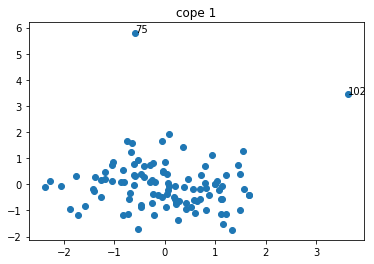

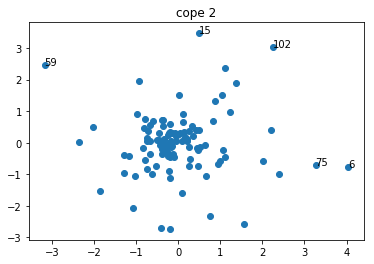

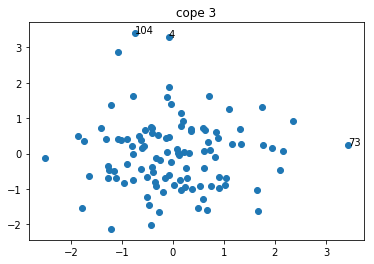

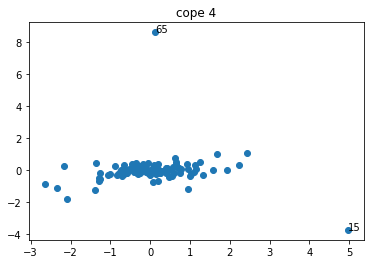

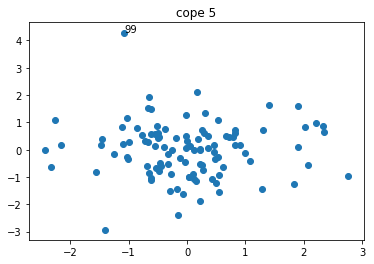

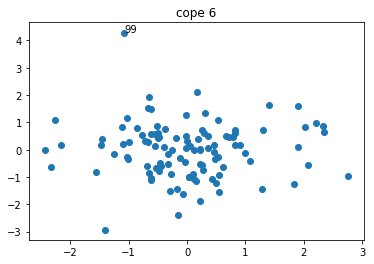

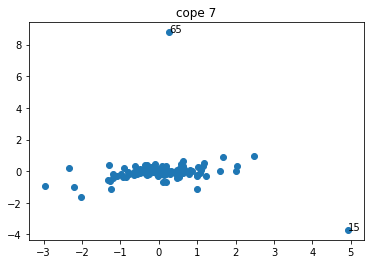

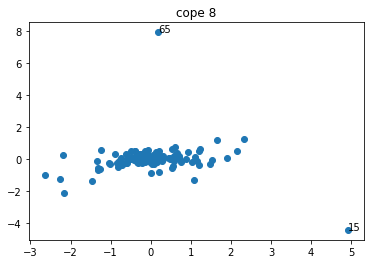

In [34]:
outliers={}
for copenum in range(1,9):
    pca_projection=get_pca(copenum)
    pca_projection_scaled=sklearn.preprocessing.scale(pca_projection)
    outlier=(numpy.max(numpy.abs(pca_projection_scaled),1)>3).astype('int')
    plt.figure()
    plt.scatter(pca_projection_scaled[:,0],pca_projection_scaled[:,1])
    plt.title('cope %d'%copenum)
    outliers[copenum]=numpy.where(outlier)[0]
    for i in outliers[copenum]:
        plt.text(pca_projection_scaled[i,0],
                 pca_projection_scaled[i,1],
                  '%d'%(i))
    plt.savefig('cope%d_pca.png'%copenum)

In [38]:
outlier_count={}
for o in outliers:
    for i in outliers[o]:
        if not i in outlier_count:
            outlier_count[i]=1
        else:
            outlier_count[i]+=1
            
for o in outlier_count:
    print(o,':',outlier_count[o])

75 : 2
102 : 2
6 : 1
15 : 4
59 : 1
4 : 1
73 : 1
104 : 1
65 : 3
99 : 2


In [26]:
?plt.text

Signature: plt.text(x, y, s, fontdict=None, withdash=False, **kwargs)
Docstring:
Add text to the axes.

Add text in string `s` to axis at location `x`, `y`, data
coordinates.

Parameters
----------
x, y : scalars
    data coordinates

s : string
    text

fontdict : dictionary, optional, default: None
    A dictionary to override the default text properties. If fontdict
    is None, the defaults are determined by your rc parameters.

withdash : boolean, optional, default: False
    Creates a `~matplotlib.text.TextWithDash` instance instead of a
    `~matplotlib.text.Text` instance.

Other parameters
----------------
kwargs : `~matplotlib.text.Text` properties.
    Other miscellaneous text parameters.

Examples
--------
Individual keyword arguments can be used to override any given
parameter::

    >>> text(x, y, s, fontsize=12)

The default transform specifies that text is in data coords,
alternatively, you can specify text in axis coords (0,0 is
lower-left and 1,1 is upper-right).  Th

In [25]:
outlier=(numpy.max(numpy.abs(pca_projection_scaled),1)>3).astype('int')

numpy.where(outlier)


(array([ 75, 102]),)

In [17]:
numpy.max(numpy.abs(pca_projection_scaled),1)

array([2.7552524, 5.4318132, 3.6240196, 4.58516  , 3.645001 , 2.9518828,
       3.168713 , 4.5068297, 3.084223 , 4.743922 , 3.013525 , 3.5427084,
       4.5662975, 4.1438956, 3.60014  , 3.0113113, 3.109443 , 2.905165 ,
       3.1410737, 2.9655418, 3.853924 , 1.7202463, 4.263086 , 3.6761522,
       4.479796 , 4.1022534, 3.8189597, 6.0154614, 2.6975927, 3.3281457,
       4.357233 , 3.6532943, 4.9379025, 3.4469662, 4.7096176, 3.5707579,
       4.1501284, 4.1635337, 2.7726982, 3.6779504, 3.4351861, 2.7180803,
       4.049891 , 5.1559205, 3.44944  , 3.526832 , 3.287751 , 3.7731087,
       3.8825486, 3.9560912, 4.7451944, 5.362323 , 4.2876606, 3.8534205,
       2.5557647, 3.6031337, 3.455662 , 2.6773007, 2.5814536, 3.1677122,
       3.3617256, 3.211426 , 4.277353 , 3.0981038, 3.500778 , 4.6969023,
       3.7996259, 3.8159082, 3.449514 , 4.3359323, 2.8218389, 1.8206035,
       4.153677 , 3.929122 , 3.1831472, 6.7293863, 3.872037 , 4.5733595,
       3.707409 , 4.1573725, 3.0323164, 4.630854 , 

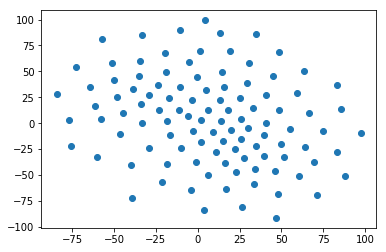

In [49]:
# try t-SNE
tSNE=TSNE()
tsne_projection=tSNE.fit_transform(copedata)
plt.scatter(tsne_projection[:,0],tsne_projection[:,1])